In [1]:
%matplotlib inline

import psycopg2.extras
import pandas as pd
from apps.backtesting.backtester_portfolio import PortfolioBacktester

from apps.backtesting.utils import datetime_to_timestamp
backtester = PortfolioBacktester(start_time=int(datetime_to_timestamp('2018/06/01 00:00:00 UTC')),
                            end_time=int(datetime_to_timestamp('2018/06/30 00:00:00 UTC')),
                            step_seconds=60*60*24,
                            portions_dict={
                                'BTC': 0.5,
                                'ETH': 0.25,
                                'OMG': 0.25
                            },
                            start_value_of_portfolio=1000)

df = backtester.value_dataframe

INFO:settings:Deployment environment detected: LOCAL
INFO:settings:LOCAL environment detected. Importing local_settings.py
INFO:redis_db:Redis connection established for app database.
INFO:redis_db:Redis currently consumes 58.6% out of 39.20G
DEBUG:root:Returning historical price data for timestamp 1527811200 (difference of 0.9372333327929179 minutes)
DEBUG:root:Returning historical price data for timestamp 1527811200 (difference of 0.942116665840149 minutes)
INFO:root:At timestamp 1527811200, portfolio stats are:
INFO:root:    -> total value: 1000.0, portion sum: 1.0
INFO:root:       500.0 BTC worth 500.0 BTC, 50.0% total
INFO:root:       3237.9644860055173 ETH worth 250.0 BTC, 25.0% total
INFO:root:       177304.96453900708 OMG worth 250.0 BTC, 25.0% total
INFO:root:{'OMG': {'amount': 177304.96453900708, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.00141, 'value': 250.0, 'timestamp': 1527811200}, 'BTC': {'amount': 500.0, 'coin': 'BTC', 'portion': 0.5, 'unit_price': 1, 'value': 500

INFO:root:{'OMG': {'amount': 175146.88774225887, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001447, 'value': 253.43754656304856, 'timestamp': 1528329600}, 'BTC': {'amount': 506.8750931260971, 'coin': 'BTC', 'portion': 0.5, 'unit_price': 1, 'value': 506.8750931260971, 'timestamp': 1528329600}, 'ETH': {'amount': 3196.498077378712, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.079286, 'value': 253.43754656304856, 'timestamp': 1528329600}}
DEBUG:root:Returning historical price data for timestamp 1528416000 (difference of 0.9229833324750264 minutes)
DEBUG:root:Returning historical price data for timestamp 1528416000 (difference of 0.9242666681607564 minutes)
DEBUG:root:Returning historical price data for timestamp 1528416000 (difference of 0.9229833324750264 minutes)
DEBUG:root:Returning historical price data for timestamp 1528416000 (difference of 0.9242666681607564 minutes)
INFO:root:At timestamp 1528416000, portfolio stats are:
INFO:root:    -> total value: 1018.6687165523756, por

DEBUG:root:Returning historical price data for timestamp 1528934400 (difference of 0.037150001525878905 minutes)
DEBUG:root:Returning historical price data for timestamp 1528934400 (difference of 0.054999999205271405 minutes)
INFO:root:At timestamp 1528934400, portfolio stats are:
INFO:root:    -> total value: 992.7863818080064, portion sum: 1.0
INFO:root:       496.3931909040032 BTC worth 496.3931909040032 BTC, 50.0% total
INFO:root:       3283.8490553446186 ETH worth 248.1965954520016 BTC, 25.0% total
INFO:root:       178174.1532318748 OMG worth 248.1965954520016 BTC, 25.0% total
INFO:root:{'OMG': {'amount': 178174.1532318748, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001393, 'value': 248.1965954520016, 'timestamp': 1528934400}, 'BTC': {'amount': 496.3931909040032, 'coin': 'BTC', 'portion': 0.5, 'unit_price': 1, 'value': 496.3931909040032, 'timestamp': 1528934400}, 'ETH': {'amount': 3283.8490553446186, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.075581, 'value': 248.1965954

DEBUG:root:Returning historical price data for timestamp 1529539200 (difference of 0.4608833352724711 minutes)
DEBUG:root:Returning historical price data for timestamp 1529539200 (difference of 0.49630000193913776 minutes)
DEBUG:root:Returning historical price data for timestamp 1529539200 (difference of 0.4608833352724711 minutes)
DEBUG:root:Returning historical price data for timestamp 1529539200 (difference of 0.49630000193913776 minutes)
INFO:root:At timestamp 1529539200, portfolio stats are:
INFO:root:    -> total value: 997.2651802993679, portion sum: 1.0
INFO:root:       498.63259014968395 BTC worth 498.63259014968395 BTC, 50.0% total
INFO:root:       3143.4084155992887 ETH worth 249.31629507484197 BTC, 25.0% total
INFO:root:       184815.63756474573 OMG worth 249.31629507484197 BTC, 25.0% total
INFO:root:{'OMG': {'amount': 184815.63756474573, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001349, 'value': 249.31629507484197, 'timestamp': 1529539200}, 'BTC': {'amount': 498.6325

INFO:root:       196900.822706241 OMG worth 235.296483133958 BTC, 25.0% total
INFO:root:{'OMG': {'amount': 196900.822706241, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001195, 'value': 235.296483133958, 'timestamp': 1530057600}, 'BTC': {'amount': 470.592966267916, 'coin': 'BTC', 'portion': 0.5, 'unit_price': 1, 'value': 470.592966267916, 'timestamp': 1530057600}, 'ETH': {'amount': 3321.9890319632636, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07083, 'value': 235.296483133958, 'timestamp': 1530057600}}
DEBUG:root:Returning historical price data for timestamp 1530144000 (difference of 0.9532499988873799 minutes)
DEBUG:root:Returning historical price data for timestamp 1530144000 (difference of 0.9753499984741211 minutes)
DEBUG:root:Returning historical price data for timestamp 1530144000 (difference of 0.9532499988873799 minutes)
DEBUG:root:Returning historical price data for timestamp 1530144000 (difference of 0.9753499984741211 minutes)
INFO:root:At timestamp 1530144000, port

In [2]:
df

,BTC,ETH,OMG,total_value
timestamp,,,,
2018-06-01,500.000000,250.000000,250.000000,1000.000000
2018-06-02,502.128104,251.064052,251.064052,1004.256208
2018-06-03,509.304917,254.652459,254.652459,1018.609834
2018-06-04,515.370667,257.685334,257.685334,1030.741335
2018-06-05,509.168952,254.584476,254.584476,1018.337904
2018-06-06,510.944630,255.472315,255.472315,1021.889261
2018-06-07,506.875093,253.437547,253.437547,1013.750186
2018-06-08,509.334358,254.667179,254.667179,1018.668717
2018-06-09,506.751236,253.375618,253.375618,1013.502472


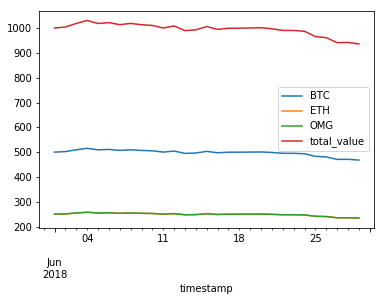

In [3]:
df.plot()

In [4]:
backtester.get_dataframe_for_coin('ETH')

,amount,coin,portion,timestamp,unit_price,value
0,3237.964486,ETH,0.25,1527811200,0.077209,250.000000
1,3258.667687,ETH,0.25,1527897600,0.077045,251.064052
2,3291.146475,ETH,0.25,1527984000,0.077375,254.652459
3,3209.272595,ETH,0.25,1528070400,0.080294,257.685334
4,3222.425142,ETH,0.25,1528156800,0.079004,254.584476
5,3199.844026,ETH,0.25,1528243200,0.079839,255.472315
6,3196.498077,ETH,0.25,1528329600,0.079286,253.437547
7,3238.681107,ETH,0.25,1528416000,0.078633,254.667179
8,3218.285916,ETH,0.25,1528502400,0.078730,253.375618
9,3190.520845,ETH,0.25,1528588800,0.079190,252.657346


In [5]:
backtester.get_benchmark_trading_dataframe_for_coin('ETH')

,close_price,signal,order,cash,crypto,total_value,order_obj,signal_obj,return_from_initial_investment,return_relative_to_past_tick
timestamp,,,,,,,,,,
1527811200,0.077209,,BUY,0,12938.906086,999.000000,2018/06/01 00:00:00 UTC \t OrderType.BUY \...,None,-0.001000,NaN
1527897600,0.077045,,,0,12938.906086,996.878019,None,None,-0.003122,-0.002124
1527984000,0.077375,,,0,12938.906086,1001.147858,None,None,0.001148,0.004283
1528070400,0.080294,,,0,12938.906086,1038.916525,None,None,0.038917,0.037725
1528156800,0.079004,,,0,12938.906086,1022.225336,None,None,0.022225,-0.016066
1528243200,0.079839,,,0,12938.906086,1033.029194,None,None,0.033029,0.010569
1528329600,0.079286,,,0,12938.906086,1025.874108,None,None,0.025874,-0.006926
1528416000,0.078633,,,0,12938.906086,1017.424873,None,None,0.017425,-0.008236
1528502400,0.078730,,,0,12938.906086,1018.679947,None,None,0.018680,0.001234
